## Семинар 13: "Обучение с подкреплением 1"

ФИО: Калашников Дмитрий

###  FrozenLake


<img src="http://vignette2.wikia.nocookie.net/riseoftheguardians/images/4/4c/Jack's_little_sister_on_the_ice.jpg/revision/latest?cb=20141218030206" alt="a random image to attract attention" style="width: 400px;"/>



In [1]:
import gym
import numpy as np 

#create a single game instance
env = gym.make("FrozenLake-v0")

#start new game
env.reset();

In [2]:
# display the game state
env.render()


SFFF
FHFH
FFFH
HFFG


### legend

![img](https://cdn-images-1.medium.com/max/800/1*MCjDzR-wfMMkS0rPqXSmKw.png)

### Gym interface

The three main methods of an environment are
* __reset()__ - reset environment to initial state, _return first observation_
* __render()__ - show current environment state (a more colorful version :) )
* __step(a)__ - commit action __a__ and return (new observation, reward, is done, info)
 * _new observation_ - an observation right after commiting the action __a__
 * _reward_ - a number representing your reward for commiting action __a__
 * _is done_ - True if the MDP has just finished, False if still in progress
 * _info_ - some auxilary stuff about what just happened. Ignore it for now

In [3]:
print("initial observation code:", env.reset())
print('printing observation:')
env.render()
print("observations:", env.observation_space, 'n=', env.observation_space.n)
print("actions:", env.action_space, 'n=', env.action_space.n)

initial observation code: 0
printing observation:

SFFF
FHFH
FFFH
HFFG
observations: Discrete(16) n= 16
actions: Discrete(4) n= 4


In [4]:
print("taking action 2 (right)")
new_obs, reward, is_done, _ = env.step(2)
print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)
print("printing new state:")
env.render()

taking action 2 (right)
new observation code: 0
reward: 0.0
is game over?: False
printing new state:
  (Right)
SFFF
FHFH
FFFH
HFFG


In [8]:
env.compute_reward()

TypeError: ignored

In [ ]:
env.__dir__()

In [53]:
action_to_i = {
    'left':0,
    'down':1,
    'right':2, 
    'up':3
}

### Попробуйте походить по замерзшему озеру, не упав в дырку. 
* Каждый шаг вы с вероятностью __0.5__ будете двигаться в выбранном направлении и с вероятностью __0.5__ в случайном.
* Если упадете, используйте __env.reset()__ чтобы перезапустить __env__

In [ ]:
#env.reset()
env.render()
new_obs, reward, is_done, _ = env.step(2)
print("new observation code:", new_obs)

  (Right)
SFFF
FHFH
FFFH
HFFG
new observation code: 5


In [ ]:
strategy = {...}

In [ ]:
for i_episode in range(2):
    observation = env.reset()
    next_step = action_to_i['right']
    for t in range(10):
        env.render()
        print(observation)
        observation, reward, done, info = env.step(next_step)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
        if next_step % 4 == 3:
            next_step = action_to_i['down']
        
#env.close()

## Задание: 
Следуя шаблонам функций реализуйте алгоритм Policy iteration.
Протестируйте его с помощью функции __evaluate_policy__.
Попробуйте разные значение для gamma и сравните результаты.

In [79]:
import numpy as np
from tqdm.notebook import tqdm as tqdm

In [71]:
def run_episode(env, policy, gamma = 1.0, render = False):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

In [72]:
def evaluate_policy(env, policy, gamma = 1.0,  n = 100):
    scores = [
            run_episode(env, policy, gamma = gamma, render = False)
            for _ in range(n)]
    return np.mean(scores)

In [92]:
# Используя фиксированную value_function и жадную стратегию получите policy

ACTIONS_NUM = 4
def extract_policy(v, gamma = 1.0, max_iteration=10000):
    n = v.size
    policy = np.zeros(n)

    for i in range(max_iteration):
        policy_stable = True
        for s in range(n):
            values = []
            cur_best_step = policy[s]
            for action in range(ACTIONS_NUM):
                value = 0
                for prob, new_s, r, done in env.P[s][action]:
                    value += prob * (r + gamma * v[new_s])
                values.append( value )

            best_step = np.argmax(values)
            if best_step != cur_best_step:
                policy_stable = False

            policy[s] = best_step
        
        if policy_stable:
            break

    return policy

In [105]:
# Используя фиксированную policy с помощью сэмплирования получите оценку для value_function с точностью 1e-10

def compute_policy_v(env, policy, gamma=1.0, max_iterations = 10000, eps=1e-10):
    n = env.observation_space.n
    v = np.zeros( n )

    for i in range(max_iterations):
        delta = 0
        for s in range(n):
            value = 0
            for prob, new_s, r, done in env.P[s][policy[s]]:
                value += prob * (r + gamma * v[new_s])
            delta = max(delta, abs(v[s] - value))
            v[s] = value
        if delta <= eps:
            break
        if i == max_iterations - 1:
            print('Compute Policy V hasnt converged')

    return v

In [114]:
def policy_iteration(env, gamma = 1.0):
    
    max_iterations = 100000

    policy = np.zeros(env.observation_space.n)
    for i in range(max_iterations):
        old_policy_v = compute_policy_v(env, policy, gamma)
        new_policy = extract_policy(old_policy_v, gamma)
        if (np.all(policy == new_policy)):
            break
        policy = new_policy
        if i == max_iterations - 1:
            print('Policy iterations hasnt converged')

    return policy

In [112]:
gamma = 1.0
env = gym.make("FrozenLake-v0")
optimal_policy = policy_iteration(env.env, gamma=gamma)
policy_score = evaluate_policy(env, optimal_policy, gamma, n=100)

print(policy_score)

0.77


In [119]:
results = []
gammas = np.linspace(0, 1, 20)
for gamma in gammas:
    env = gym.make("FrozenLake-v0")
    optimal_policy = policy_iteration(env.env, gamma=gamma)
    policy_score = evaluate_policy(env, optimal_policy, gamma, n=100)

    results.append(policy_score)

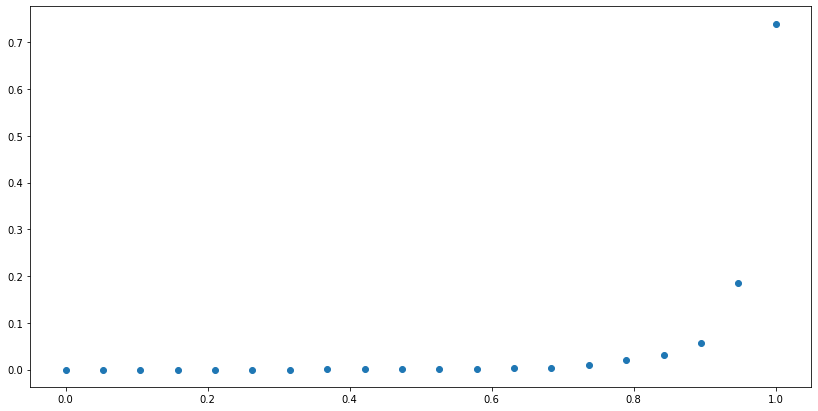

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.scatter(gammas, results) 
